# Project description

ICR - Identifying Age-Related Conditions

Use Machine Learning to detect conditions with measurements of anonymous characteristics

[ICR - Invitro Cell Research](https://invitrocellresearch.com/)

## Target of the project

- create a model trained on measurements of health characteristics.

- predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0)

## Goal of the project

- shorten a long and intrusive process to collect information from patients by collecting key characteristics relative to the conditions

- keep patient details private by encoding these characteristics upon having collected them.

- help medical researchers discover the relationship between measurements of certain characteristics and potential patient conditions.

## Context

- working with measurements of health characteristic data (encoded) to solve critical problems in bioinformatics.

-  the number of samples is relatively small (618).

-  XGBoost and random forest are used to predict medical conditions yet the models' performance is not good enough

-  diverse data (46  anonymized health characteristics, all are nemerical, except for one, which is categorical)

-  explore new methods to solve complex problems with diverse data (LightGBM, CatBoost etc - gradient boosting on decision trees)

# Project Data

## train.csv - The training set.

In [1]:
import pandas as pd
data_traine = pd.read_csv("data/train.csv", index_col="Id")
data_traine.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [51]:
data_traine.shape

(617, 57)

- Id Unique identifier for each observation.
- AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
- Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

## greeks.csv - Supplemental metadata, only available for the training set.

In [52]:
data_greeks = pd.read_csv("data/greeks.csv", index_col="Id")
data_greeks.head()

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019
007255e47698,A,C,M,B,Unknown
013f2bd269f5,A,C,M,B,Unknown
043ac50845d5,A,C,M,B,Unknown
044fb8a146ec,D,B,F,B,3/25/2020


In [53]:
data_greeks.shape

(617, 5)

- Alpha Identifies the type of age-related condition, if present.
-- A No age-related condition. Corresponds to class 0.
-- B, D, G The three age-related conditions. Correspond to class 1.

- Beta, Gamma, Delta Three experimental characteristics.

- Epsilon The date the data for this subject was collected.

## test.csv - test.csv - The test set. Our goal is to predict the probability that a subject in this set belongs to each of the two classes.

In [54]:
data_test = pd.read_csv("data/test.csv", index_col="Id")
data_test.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data_test.shape

(5, 56)

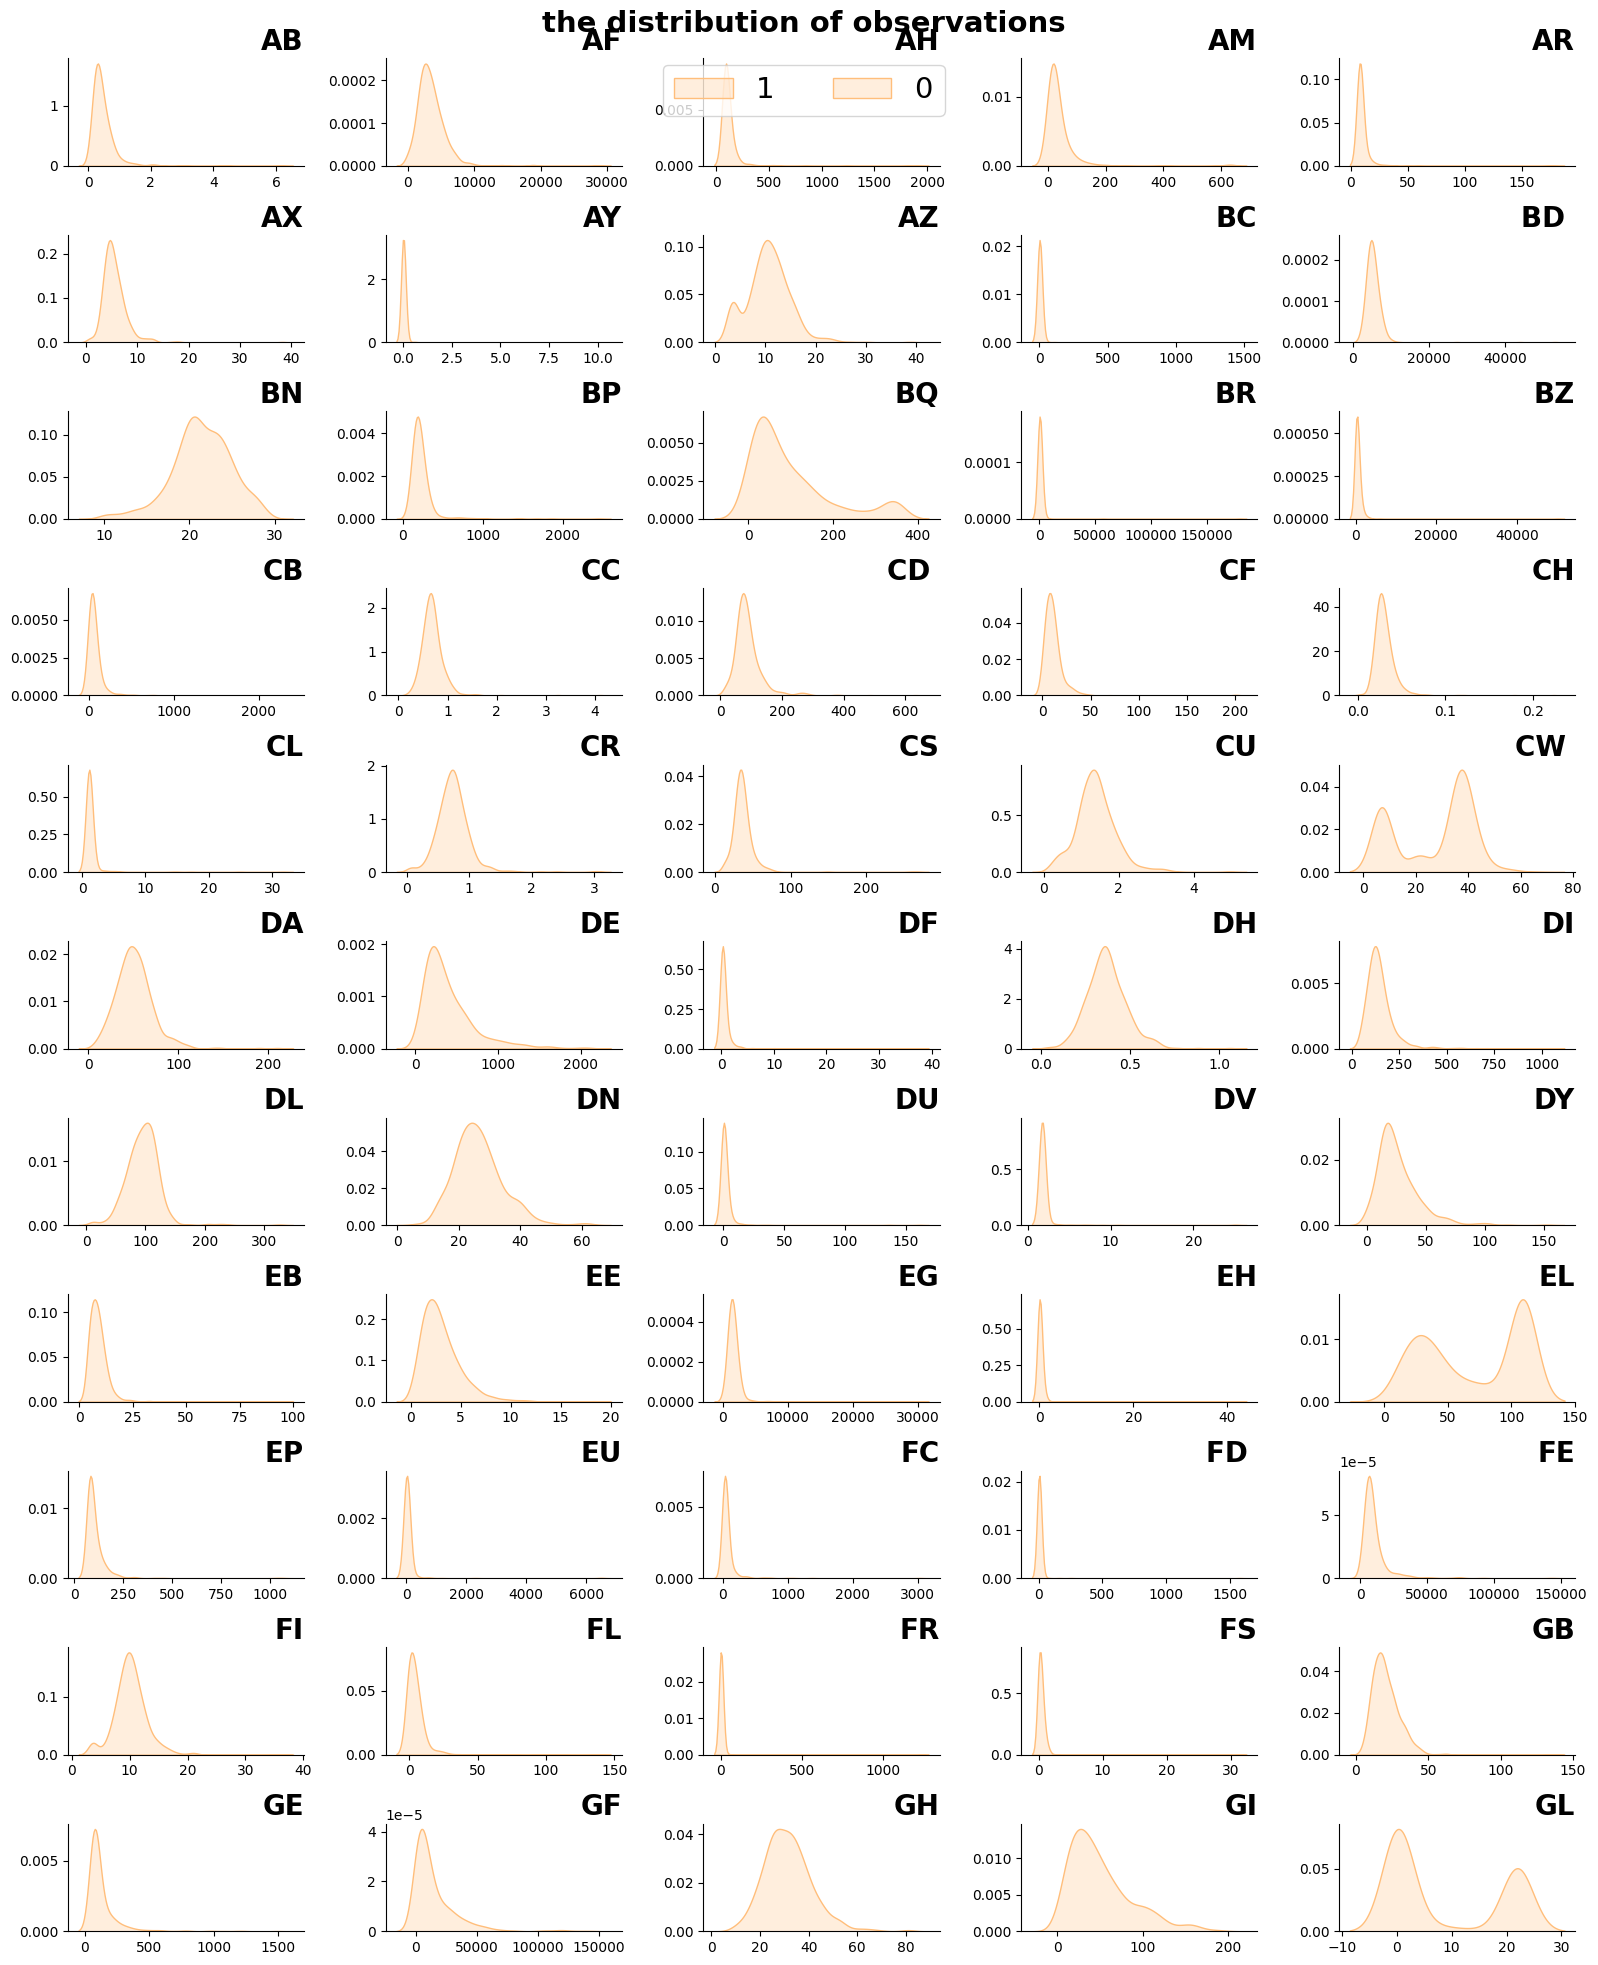

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
target = data_traine["Class"]

data_traine.drop(columns=["Class"], axis=1, inplace=True)
num_features = data_traine.select_dtypes(include="number")
#
figsize = (4 * 4, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(num_features):
    ax = plt.subplot(11, 5, idx + 1)
    sns.kdeplot(data=num_features, fill=True, x=col, color="#FFBE7B", legend=False)

    ax.set_ylabel("")
    ax.spines["top"].set_visible(False),
    ax.set_xlabel("")
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{col}", loc="right", weight="bold", fontsize=20)

fig.suptitle(f"the distribution of observations", ha="center", fontweight="bold", fontsize=21)
fig.legend([1, 0], loc="upper center", bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

# Submission - a sample submission file

In [57]:
data_submission = pd.read_csv("data/sample_submission.csv", index_col="Id")
data_submission.head()

,class_0,class_1
Id,,
00eed32682bb,0.5,0.5
010ebe33f668,0.5,0.5
02fa521e1838,0.5,0.5
040e15f562a2,0.5,0.5
046e85c7cc7f,0.5,0.5


In [58]:
data_submission.shape

(5, 2)

- Submissions are evaluated using a balanced logarithmic loss.
- Each observation is either of class 0 or of class 1. For each observation, you must submit a probability for each class. The formula is then:
$$\text{Log Loss} = \frac{-\frac{1}{N_{0}} \sum_{i=1}^{N_{0}} y_{0 i} \log  p_{0 i} - \frac {1}{N_{1}} \sum_{i=1}^{N_{1}} y_{1 i} \log  p_{1 i} } { 2 }$$


- where $N_{c}$ is the number of observations of class (c), $\log$ is the natural logarithm, $y_{c i}$ is 1 if observation (i) belongs to class (c) and 0 otherwise, $p_{c i}$ is the predicted probability that observation (i) belongs to class (c).
- For each id in the test set, we must predict a probability for each of the two classes. The file should contain a header and have the following format:

# Thank you for watching